In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/insurance%20(2).csv")

In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
884,25,male,26.695,4,no,northwest,4877.98105
1200,37,male,24.320,2,no,northwest,6198.75180
1032,30,female,27.930,0,no,northeast,4137.52270
679,49,female,23.180,2,no,northwest,10156.78320
1066,48,male,37.290,2,no,southeast,8978.18510
243,40,male,35.300,3,no,southwest,7196.86700
640,33,male,42.400,5,no,southwest,6666.24300
1228,56,male,34.430,0,no,southeast,10594.22570
1234,45,female,27.830,2,no,southeast,8515.75870
486,54,female,21.470,3,no,northwest,12475.35130


In [10]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
copy=df.duplicated()

In [12]:
print(copy.sum())

1


In [13]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

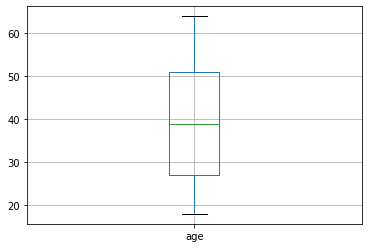

In [14]:
df.boxplot(column=["age"])

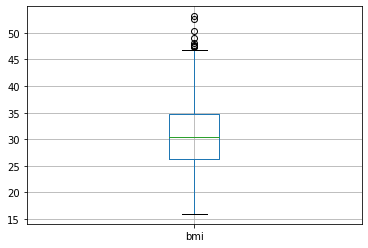

In [15]:
df.boxplot(column=["bmi"])

In [16]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [18]:
low_bmi,high_bmi=remove_outliers(df["bmi"])
df["bmi"]=np.where(df["bmi"]>high_bmi,high_bmi,df["bmi"])
df["bmi"]=np.where(df["bmi"]<low_bmi,low_bmi,df["bmi"])



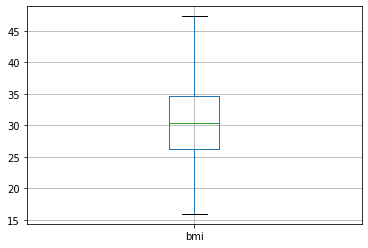

In [20]:
df.boxplot(column=["bmi"])

In [21]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [22]:
df.drop("sex",axis=1,inplace=True)

In [23]:
df.head(20)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520
5,31,25.740,0,no,southeast,3756.62160
6,46,33.440,1,no,southeast,8240.58960
7,37,27.740,3,no,northwest,7281.50560
8,37,29.830,2,no,northeast,6406.41070
9,60,25.840,0,no,northwest,28923.13692


In [24]:
df.drop('smoker',axis=1,inplace=True)

In [25]:
df.head(10)

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520
5,31,25.740,0,southeast,3756.62160
6,46,33.440,1,southeast,8240.58960
7,37,27.740,3,northwest,7281.50560
8,37,29.830,2,northeast,6406.41070
9,60,25.840,0,northwest,28923.13692


In [31]:
df.sample(20)

,age,bmi,children,region,charges
1256,51,36.385,3,northwest,11436.73815
891,36,29.040,4,southeast,7243.81360
646,39,26.220,1,northwest,6123.56880
783,50,27.600,1,southwest,24520.26400
261,20,26.840,1,southeast,17085.26760
292,25,45.540,2,southeast,42112.23560
216,53,26.600,0,northwest,10355.64100
840,21,31.100,0,southwest,1526.31200
347,46,33.345,1,northeast,8334.45755
672,36,29.700,0,southeast,4399.73100


In [41]:
X=df.drop(['age'],axis=1)
Y=df[['age']]

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [42]:
model_1=LinearRegression()
model_1.fit(X_train, Y_train)


LinearRegression()

In [43]:
model_1.score(X_train, Y_train)

0.09550153228828528

Not a good model

In [44]:
model_1.score(X_test, Y_test)

0.07735643527233937

Not a good model